In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Configurations
file_path=r'C:\Users\Admin\insurance_charges_claim_prediction.xlsx'
col_list=['age','sex','bmi','steps','children','smoker','region','charges','insuranceclaim']

In [3]:
#Read the input file
df=pd.read_excel(file_path)
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [5]:
#Create a copy of data to work with
customer_data=df.copy()

print(customer_data.isnull().sum())

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [6]:
customer_data.columns.size

9

In [7]:
customer_data.select_dtypes(include='number').columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

All columns are numeric in nature.

The objective of this analysis is to determine the characteristics of people with high individual medical costs billed by health insurane.Also with the characteristics we have to identify if the person will make a health insurance claim.

# Step1:Analyze each column wrt charges, to identify characteristics of people with maximum claim amount.

In [8]:
#Lets find the maximum charge claimed by insurance
print(customer_data[col_list[7]].max())
print(customer_data[col_list[7]].min())

63770.42801
1121.8739


In [9]:
from more_itertools import numeric_range

In [10]:
def calc_range(colName):
    min_value=np.round(customer_data[colName].min(),2)
    max_value=np.round(customer_data[colName].max(),2)
    value_range = max_value - min_value
    
    # let's round the bin width
    inter_value = np.round(value_range/10,2)
    
    #more_itertools.numeric_range(start, stop, step)
    intervals = [i for i in np.round(numeric_range(min_value, max_value+inter_value, inter_value),2)]
    return intervals

In [11]:
#discretisation of charges column for further analysis
intervals=calc_range(col_list[7])
customer_data['charges_disc'] = pd.cut(x = customer_data['charges'], bins=intervals, include_lowest=True)


In [12]:
##Comparing age column with charges column
intervals=calc_range(col_list[0])
customer_data['age_disc'] = pd.cut(x = customer_data[col_list[0]], bins=intervals, include_lowest=True)

<AxesSubplot:xlabel='age_disc', ylabel='charges'>

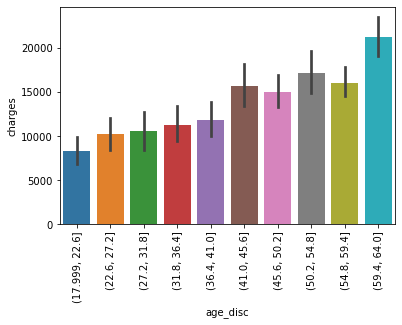

In [13]:
plt.xticks(rotation=90)
sns.barplot(x='age_disc',y='charges',data=customer_data)

As we can clearly see charges increase with age.Age greater than 40 has higher amount of charges claimed.

<AxesSubplot:xlabel='sex', ylabel='charges'>

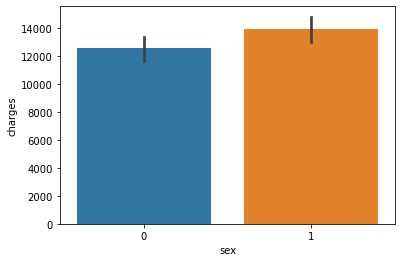

In [14]:
##Comparing sex column with charges column
sns.barplot(x='sex',y='charges',data=customer_data)

Male customers have slightly higher claim charges compared to female customers.

In [55]:
##Comparing bmi column with charges column
intervals=calc_range(col_list[2])
customer_data['bmi_disc'] = pd.cut(x = customer_data[col_list[2]], bins=intervals, include_lowest=True)

In [54]:
customer_data['bmi']=np.round(customer_data['bmi'])

<AxesSubplot:xlabel='bmi_disc', ylabel='charges'>

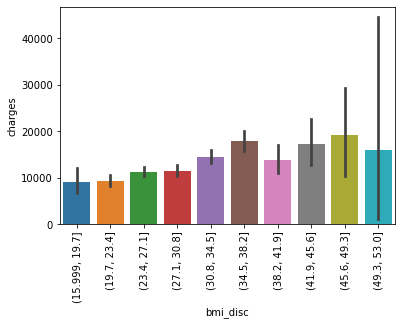

In [56]:
plt.xticks(rotation=90)
sns.barplot(x='bmi_disc',y='charges',data=customer_data)

BMI greater than 42 has higher claim charges.

In [17]:
intervals=calc_range(col_list[3])
customer_data['steps_disc'] = pd.cut(x = customer_data[col_list[3]], bins=intervals, include_lowest=True)

<AxesSubplot:xlabel='steps_disc', ylabel='charges'>

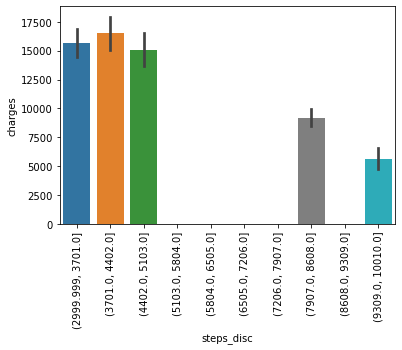

In [18]:
plt.xticks(rotation=90)
sns.barplot(x='steps_disc',y='charges',data=customer_data)

We can see that when the steps is less than 5000, claim is high.

<AxesSubplot:xlabel='children', ylabel='charges'>

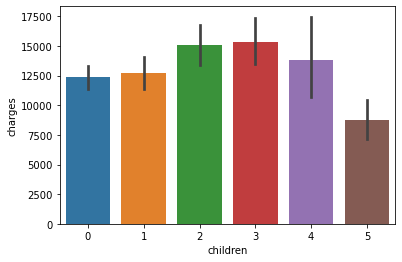

In [19]:
sns.barplot(x='children',y='charges',data=customer_data)

Children 2 3 and 4 category have higher claim charges.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

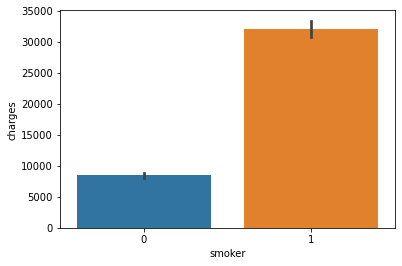

In [20]:
sns.barplot(x='smoker',y='charges',data=customer_data)

Smokers have larger claim charges compared to non-smokers.

<AxesSubplot:xlabel='region', ylabel='charges'>

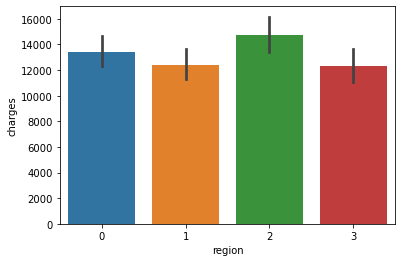

In [21]:
sns.barplot(x='region',y='charges',data=customer_data)

All region categories have claim charges greater than 12000.Region 2 has slightly higher charges compared to other region categories.

# Summary: 
#                     1.Age greater than 40
 #                    2.BMI greater than 42 
   #                  3.Steps less than 5000 
#                     4.smoker 
# are the four major characteristics of person identified as having higher claim charges.

# Step 2: Comparing each column with the target.

In [22]:
#Method to find the proportion of people with target 1 wrt input
def calc_perc(colname):
    df1=pd.DataFrame(customer_data.groupby([colname])[col_list[8]].count())
    df2=pd.DataFrame(customer_data.groupby([colname])[col_list[8]].sum())
    df3=pd.merge(df1,df2,on=colname)
    df3.rename(columns={'insuranceclaim_x':'insuranceclaim_total','insuranceclaim_y':'insuranceclaim_1'},inplace=True)
    df3['insuranceclaim_0']=df3['insuranceclaim_total']-df3['insuranceclaim_1']
    df3['perc_ppl_who_made_insurance_claim']=(df3['insuranceclaim_1']/df3['insuranceclaim_total'])*100
    return df3

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_disc', ylabel='count'>

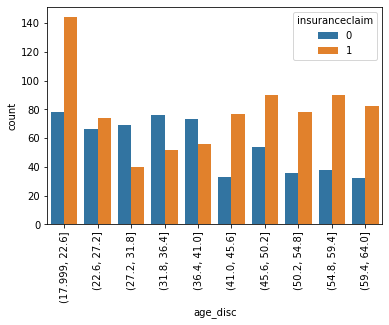

In [23]:
#sns.barplot(x='insuranceclaim',y='age_disc',data=customer_data)
plt.xticks(rotation=90)
sns.countplot(customer_data.age_disc, hue=customer_data.insuranceclaim)

In [24]:
#comparing age with target column
df_age=calc_perc('age_disc')
df_age

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
age_disc,,,,
"(17.999, 22.6]",222,144,78,64.864865
"(22.6, 27.2]",140,74,66,52.857143
"(27.2, 31.8]",109,40,69,36.697248
"(31.8, 36.4]",128,52,76,40.625000
"(36.4, 41.0]",129,56,73,43.410853
"(41.0, 45.6]",110,77,33,70.000000
"(45.6, 50.2]",144,90,54,62.500000
"(50.2, 54.8]",114,78,36,68.421053
"(54.8, 59.4]",128,90,38,70.312500


Age less than 22 and above 41 categories have around 60 to 70 percent of people making insurance claims.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi_disc', ylabel='count'>

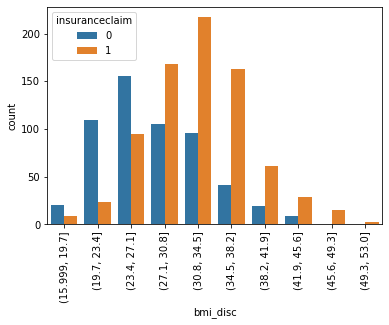

In [57]:
plt.xticks(rotation=90)
sns.countplot(customer_data.bmi_disc, hue=customer_data.insuranceclaim)

In [25]:
#comparing bmi with target column
df_bmi=calc_perc('bmi_disc')
df_bmi

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
bmi_disc,,,,
"(15.959000000000001, 19.68]",30,9,21,30.000000
"(19.68, 23.4]",129,23,106,17.829457
"(23.4, 27.12]",232,84,148,36.206897
"(27.12, 30.84]",319,193,126,60.501567
"(30.84, 34.56]",288,203,85,70.486111
"(34.56, 38.28]",198,158,40,79.797980
"(38.28, 42.0]",93,73,20,78.494624
"(42.0, 45.72]",32,23,9,71.875000
"(45.72, 49.44]",14,14,0,100.000000


BMI greater than 27 has greater percentage of people who have made insurance claim.BMI more than 45 category has 100 percent of people making insurance claims.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

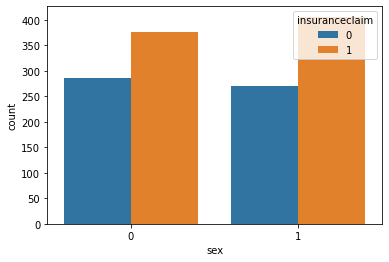

In [45]:
sns.countplot(customer_data.sex, hue=customer_data.insuranceclaim)

In [26]:
#comparing sex with target column
df_sex=calc_perc(col_list[1])
df_sex

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
sex,,,,
0,662,377,285,56.948640
1,676,406,270,60.059172


Both male and female customers have same percentage of people making insurance claim.(56-60%)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='steps_disc', ylabel='count'>

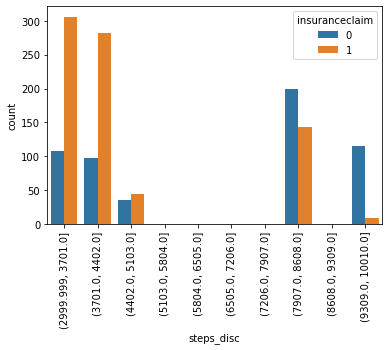

In [47]:
plt.xticks(rotation=90)
sns.countplot(customer_data.steps_disc, hue=customer_data.insuranceclaim)

In [27]:
#comparing steps column with target
df_steps=calc_perc('steps_disc')
df_steps

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
steps_disc,,,,
"(2999.999, 3701.0]",414,306,108,73.913043
"(3701.0, 4402.0]",380,282,98,74.210526
"(4402.0, 5103.0]",79,44,35,55.696203
"(5103.0, 5804.0]",0,0,0,NaN
"(5804.0, 6505.0]",0,0,0,NaN
"(6505.0, 7206.0]",0,0,0,NaN
"(7206.0, 7907.0]",0,0,0,NaN
"(7907.0, 8608.0]",342,143,199,41.812865
"(8608.0, 9309.0]",0,0,0,NaN


Steps less than 5000 have greater percentage of people making insurance claims(55-74%).Steps above 7900 have 6-41% of people making claims.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

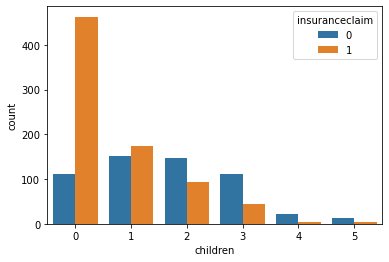

In [53]:
sns.countplot(customer_data.children, hue=customer_data.insuranceclaim)

In [28]:
df_children=calc_perc(col_list[4])
df_children

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
children,,,,
0,574,463,111,80.662021
1,324,173,151,53.395062
2,240,94,146,39.166667
3,157,45,112,28.662420
4,25,4,21,16.000000
5,18,4,14,22.222222


Children 0 category have 80 percentage of people who have made claim compared to other categories.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

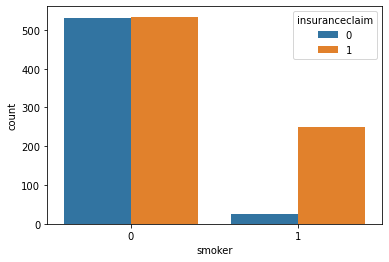

In [49]:
sns.countplot(customer_data.smoker, hue=customer_data.insuranceclaim)

In [29]:
df_smoker=calc_perc(col_list[5])
df_smoker

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
smoker,,,,
0,1064,534,530,50.187970
1,274,249,25,90.875912


90 percent people in smoker category have made insurance claim.In non-smoker it is 50%.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

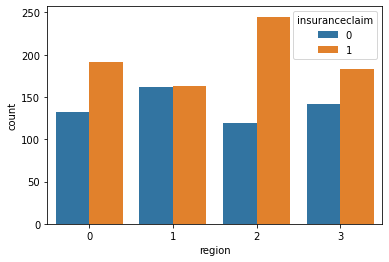

In [50]:
sns.countplot(customer_data.region, hue=customer_data.insuranceclaim)

In [30]:
df_region=calc_perc(col_list[6])
df_region

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
region,,,,
0,324,192,132,59.259259
1,325,163,162,50.153846
2,364,245,119,67.307692
3,325,183,142,56.307692


All region categories have greater than 50 percent of people making claims.

<AxesSubplot:xlabel='insuranceclaim', ylabel='charges'>

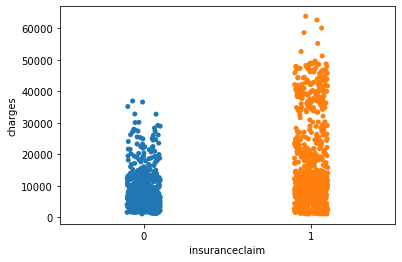

In [52]:
sns.stripplot(x=customer_data.insuranceclaim, y=customer_data.charges)

In [31]:
df_charges=calc_perc('charges_disc')
df_charges

,insuranceclaim_total,insuranceclaim_1,insuranceclaim_0,perc_ppl_who_made_insurance_claim
charges_disc,,,,
"(1121.869, 7386.73]",536,234,302,43.656716
"(7386.73, 13651.59]",398,232,166,58.291457
"(13651.59, 19916.45]",129,84,45,65.116279
"(19916.45, 26181.31]",86,60,26,69.767442
"(26181.31, 32446.17]",35,24,11,68.571429
"(32446.17, 38711.03]",59,54,5,91.525424
"(38711.03, 44975.89]",57,57,0,100.000000
"(44975.89, 51240.75]",32,32,0,100.000000
"(51240.75, 57505.61]",2,2,0,100.000000


All people who have not made any claim have charges less than 40k.Above 40k 100 percent of people have made claims.

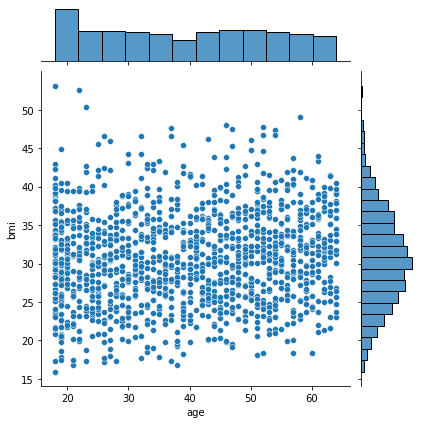

In [32]:
#Comparing age with bmi for any correlation
sns.jointplot(x='age',y='bmi',data=customer_data)

In [33]:
customer_data.corr()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


In [36]:
#Write the final output to an excel file
writer = pd.ExcelWriter(r'C:\Users\ADMIN\Desktop\UseCase3_EDAOutput.xlsx')
customer_data.to_excel(writer,index = False, header=True)
writer.save()

bmi,steps,children,smoker and charges are identified as having impact on claim.Lets create a model taking into account these features.

Lets check the distribution of the above identified variables.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

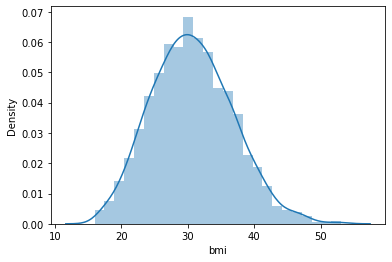

In [37]:
sns.distplot(customer_data.bmi)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='steps', ylabel='Density'>

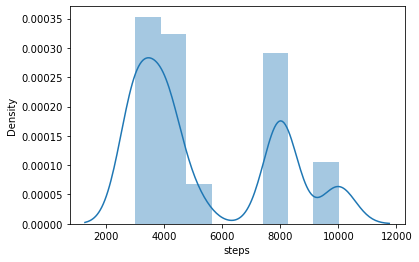

In [38]:
sns.distplot(customer_data.steps)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

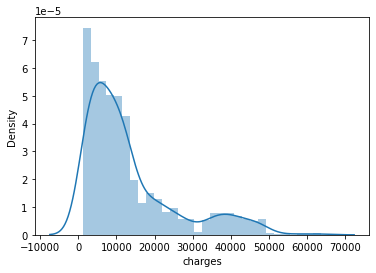

In [41]:
sns.distplot(customer_data.charges)